# Data Preparation

## 1. Import Library and Dataset

In [1]:
## Computing
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Split Data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

## Handling Outliers
from scipy import stats

## Encod
from sklearn import preprocessing

## Multicollinearity
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 

## Scaling
from sklearn.preprocessing import StandardScaler

## Handling Imbalance Data
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

## Clasification Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score)

import warnings
warnings.simplefilter(action='ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [2]:
data_ori = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
loan = data_ori.copy()

## 2. Data Understanding

In [4]:
loan.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
## Cek unique values pada Dataframe
for x in loan.columns : 
    print (f'===== {x} =====')
    print (f'{loan[x].unique()}')
    print()

===== Unnamed: 0 =====
[     0      1      2 ... 466282 466283 466284]

===== id =====
[1077501 1077430 1077175 ... 9584776 9604874 9199665]

===== member_id =====
[ 1296599  1314167  1313524 ... 11436914 11457002 11061576]

===== loan_amnt =====
[ 5000  2500  2400 ... 33675 27775 33175]

===== funded_amnt =====
[ 5000  2500  2400 ... 27775 33175 31725]

===== funded_amnt_inv =====
[ 4975.  2500.  2400. ... 30425. 33125. 33625.]

===== term =====
[' 36 months' ' 60 months']

===== int_rate =====
[10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13

[ 83.7   9.4  98.5 ... 111.3 113.  141.8]

===== total_acc =====
[  9.   4.  10.  37.  38.  12.  11.  13.   3.  23.  34.  29.  28.  42.
  14.  22.  21.  17.   7.  31.  44.  26.  16.   6.  18.  27.  24.  25.
  40.  35.   8.  20.  15.  19.  36.  51.  32.  30.  33.  46.   5.  61.
  56.  50.  41.  39.  79.  62.  43.  47.  53.  45.  60.  55.  52.  58.
  54.  57.  49.  63.  48.  59.  77.  87.  75.  72.  64.  67.  78.  76.
  74.  66.  81.  90.  80.  71.  69.  73.  70.  68.  65.   2.   1.  nan
 105.  83.  84.  98.  88.  82.  91.  99.  86.  93.  92.  96. 101. 150.
  95.  85. 156.  89. 106.  97. 119. 124. 100.  94. 121. 102. 117. 116.
 118.]

===== initial_list_status =====
['f' 'w']

===== out_prncp =====
[    0.     766.9   1889.15 ... 12574.   14428.31  3984.38]

===== out_prncp_inv =====
[    0.     766.9   1889.15 ... 12574.   14428.31  3974.41]

===== total_pymnt =====
[ 5861.071414  1008.71      3003.653644 ... 12343.98      2126.579838
  8821.62    ]

===== total_pymnt_inv =====
[ 5831.7

#### Conclutsion : 

- Dataset terdiri dari 466285 baris dan 75 kolom
- Terdapat Missing values


#### Feature Transform
- Column `verification_status` ubah Verified dan Not Verified saja (Source Verified dikategorikan menjadi Verified)
- Label Encod colum `grade`

#### Delete Column
- Delete column `Unnamed: 0`, `member_id`, `id`, `url`, `zip_code`, `desc` because the data is will not use for analysis 
- Delete column `policy_code` and `application_type` becuase only have 1 unique values

## 3. Data Cleaning

### 3.1 Duplicated Rows

In [7]:
# Check duplicate rows
loan.duplicated().sum()

0

### 3.2 Missing Values

In [8]:
## Delete column that have >40% missing values

limit40 = len(loan) * .40
loan = loan.dropna(thresh=limit40, axis=1)

In [9]:
(loan.isna().sum() * 100 / len(loan))

Unnamed: 0           0.000000
id                   0.000000
member_id            0.000000
loan_amnt            0.000000
funded_amnt          0.000000
                      ...    
application_type     0.000000
acc_now_delinq       0.006219
tot_coll_amt        15.071469
tot_cur_bal         15.071469
total_rev_hi_lim    15.071469
Length: 55, dtype: float64

- Delete column that have >40% missing values
- Imputation column that have 10%-30% missing values (Median and Modus)

In [10]:
# Handling Missing Values

# Missing Values > 40%
loan.drop(['mths_since_last_delinq', 'next_pymnt_d'], axis = 'columns', inplace = True)

# Missing Values 10-40%
loan[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']] = loan[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']].fillna(loan[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']].median())

# Missing Values < 10%
loan = loan.dropna(axis=0)

### 3.3 Delete Useless Feature

In [11]:
loan.drop(['Unnamed: 0', 'member_id', 'id', 'url', 'zip_code', 'policy_code', 'application_type'], axis = 'columns', inplace = True)

### 3.4 Feature Transform

In [12]:
## `verification_status` Encoding

def verification_status (x):
    if x == 'Source Verified':
        return 'Verified'
    elif x == 'Verified':
        return 'Verified'
    else:
        return 'Not Verified'
    
loan['verification_status'] = np.vectorize(verification_status)(loan['verification_status'])

In [13]:
le = preprocessing.LabelEncoder()
loan.grade= le.fit_transform(loan.grade.values)

In [14]:
loan.shape

(437710, 46)

Conclusion :

Baris pada dataset `loan` menjadi 223863 baris 

# Exploratory Data Analysis

## 4. Create Variable Target

Create new variable target from feature 'loan_status'
- 1 (Good Customer) = Fully Paid
- 0 (Bad Customer) = Except Fully Paid
- (Not use) = Current, In Grace Period, Default

In [15]:
loan = loan[loan.loan_status != 'Current']
loan = loan[loan.loan_status != 'In Grace Period']
loan = loan[loan.loan_status != 'Default']

In [16]:
## Loan_status Encoding

def loan_class(x):
    if x == 'Fully Paid':
        return 0
    else:
        return 1
    
loan['Credit_risk'] = np.vectorize(loan_class)(loan['loan_status'])

In [17]:
loan.drop(['loan_status'], axis = 'columns', inplace = True)

In [18]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
1       2500         2500           2500.0   60 months     15.27        59.83   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   
7       3000         3000           3000.0   36 months     18.64       109.43   
9       5375         5375           5350.0   60 months     12.69       121.45   

   grade sub_grade             emp_title emp_length home_ownership  \
1      2        C4                 Ryder   < 1 year           RENT   
3      2        C1   AIR RESOURCES BOARD  10+ years           RENT   
5      0        A4  Veolia Transportaton    3 years           RENT   
7      4        E1       MKC Accounting     9 years           RENT   
9      1        B5             Starbucks   < 1 year           RENT   

   annual_inc verification_status issue_d pymnt_plan  purpose  \
1     30000.0            Verified  Dec-11          n      car   
3     49200.0            Verified  Dec-11          n    other   
5     36000.0            Verified  Dec-11          n  wedding   
7     48000.0            Verified  Dec-11          n      car   
9     15000.0            Verified  Dec-11          n    other   

                                   title addr_state    dti  delinq_2yrs  \
1                                   bike         GA   1.00          0.0   
3                               personel         CA  20.00          0.0   
5  My wedding loan I promise to pay back         AZ  11.20          0.0   
7                        Car Downpayment         CA   5.35          0.0   
9            Building my credit history.         TX  18.08          0.0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
1           Apr-99             5.0       3.0      0.0       1687         9.4   
3           Feb-96             1.0      10.0      0.0       5598        21.0   
5           Nov-04             3.0       9.0      0.0       7963        28.3   
7           Jan-07             2.0       4.0      0.0       8221        87.5   
9           Sep-04             0.0       2.0      0.0       9279        36.5   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
1        4.0                   f        0.0            0.0   1008.710000   
3       37.0                   f        0.0            0.0  12226.302210   
5       12.0                   f        0.0            0.0   5631.377753   
7        4.0                   f        0.0            0.0   3938.144334   
9        3.0                   f        0.0            0.0   1476.190000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
1          1008.71           456.46         435.17                0.00   
3         12226.30         10000.00        2209.33               16.97   
5          5631.38          5000.00         631.38                0.00   
7          3938.14          3000.00         938.14                0.00   
9          1469.34           673.48         533.42                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
1      117.08                     1.11       Apr-13           119.66   
3        0.00                     0.00       Jan-15           357.48   
5        0.00                     0.00       Jan-15           161.03   
7        0.00                     0.00       Jan-15           111.34   
9      269.29                     2.52       Nov-12           121.45   

  last_credit_pull_d  collections_12_mths_ex_med  acc_now_delinq  \
1             Sep-13                         0.0             0.0   
3             Jan-15                         0.0             0.0   
5             Sep-15                         0.0             0.0   
7             Dec-14                         0.0             0.0   
9             Mar-13                         0.0             0.0   

   tot_coll_amt  tot_cur_bal

In [19]:
## Copy data to create business insight
loan_bi = loan.copy()

## 5. Spliting Data Train dan Test

In [20]:
## Variable target ratio
target_var = loan['Credit_risk'].value_counts(normalize=True)

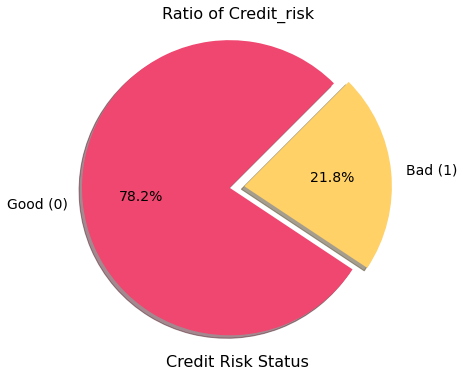

In [21]:
plt.figure(figsize=(6,6))

conversion_rate = target_var.index
count = target_var.values
colors= ['#ef476f', '#ffd166']

plt.pie(count, labels=['Good (0)','Bad (1)'],
        shadow=True,
        explode=[0.1,0],
        colors=colors, 
        autopct='%1.1f%%',
        startangle=45,
        textprops={'fontsize': 14})

plt.title('Ratio of Credit_risk',fontsize=16)
plt.xlabel('Credit Risk Status',fontsize=16)
plt.axis('equal')
plt.show()



In [22]:
# Train Test Split data

X = loan.drop('Credit_risk',axis=1).copy()
y = loan['Credit_risk'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)

In [23]:
# Insert 'Credit_risk' to X_train and X_test

X_train['Credit_risk'] = y_train
X_test['Credit_risk'] = y_test

In [24]:
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', X_train.shape)
print('y_test :', X_test.shape)

X_train : (179090, 46)
X_test : (44773, 46)
y_train : (179090, 46)
y_test : (44773, 46)


## 6. Descriptive Statistic

In [25]:
# Categorize column

numericals = X_train.select_dtypes(include=["int","float"]).columns
categoricals = X_train.select_dtypes("object").columns

print("Numericals Column {}".format(numericals.to_list()))
print("Categoricals Column {}".format(categoricals.to_list()))

Numericals Column ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'grade', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'Credit_risk']
Categoricals Column ['term', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d']


In [26]:
# Numericals Statistical Summary
X_train[numericals].describe()

loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  179090.000000  179090.000000    179090.000000  179090.000000   
mean    13589.203473   13544.333017     13416.366267      13.857017   
std      8046.646046    8023.529762      8060.612552       4.371656   
min       500.000000     500.000000         0.000000       5.420000   
25%      7500.000000    7500.000000      7200.000000      10.990000   
50%     12000.000000   12000.000000     11975.000000      13.670000   
75%     18225.000000   18000.000000     18000.000000      16.590000   
max     35000.000000   35000.000000     35000.000000      26.060000   

         installment          grade    annual_inc            dti  \
count  179090.000000  179090.000000  1.790900e+05  179090.000000   
mean      419.615714       1.804908  7.262960e+04      16.459733   
std       242.723443       1.338442  5.586202e+04       7.665189   
min        15.670000       0.000000  1.896000e+03       0.000000   
25%       243.490000       1.000000  4.500000e+04      10.760000   
50%       368.275000       2.000000  6.214200e+04      16.160000   
75%       547.840000       3.000000  8.700000e+04      21.870000   
max      1408.130000       6.000000  7.141778e+06      39.990000   

         delinq_2yrs  inq_last_6mths       open_acc        pub_rec  \
count  179090.000000   179090.000000  179090.000000  179090.000000   
mean        0.250221        0.904702      10.931816       0.130767   
std         0.740226        1.169283       4.835359       0.414710   
min         0.000000        0.000000       1.000000       0.000000   
25%         0.000000        0.000000       8.000000       0.000000   
50%         0.000000        1.000000      10.000000       0.000000   
75%         0.000000        1.000000      14.000000       0.000000   
max        29.000000       32.000000      76.000000      10.000000   

          revol_bal     revol_util      total_acc      out_prncp  \
count  1.790900e+05  179090.000000  179090.000000  179090.000000   
mean   1.529529e+04      55.226556      24.895014     342.153301   
std    1.885841e+04      24.620785      11.649436    2236.823530   
min    0.000000e+00       0.000000       1.000000       0.000000   
25%    6.001000e+03      37.600000      16.000000       0.000000   
50%    1.111000e+04      56.900000      23.000000       0.000000   
75%    1.918200e+04      74.700000      32.000000       0.000000   
max    1.743266e+06     892.300000     118.000000   31898.770000   

       out_prncp_inv    total_pymnt  total_pymnt_inv  total_rec_prncp  \
count  179090.000000  179090.000000    179090.000000    179090.000000   
mean      342.034776   13556.588350     13423.214037     11242.409217   
std      2236.149633    9372.695231      9383.147101      8146.858847   
min         0.000000      33.730000         0.000000         0.000000   
25%         0.000000    6466.072500      6338.810000      5000.000000   
50%         0.000000   11415.515000     11288.895000     10000.000000   
75%         0.000000   18373.840810     18223.310000     15600.000000   
max     31898.770000   57777.579870     57777.580000     35000.030000   

       total_rec_int  total_rec_late_fee     recoveries  \
count  179090.000000       179090.000000  179090.000000   
mean     2148.525312            0.911925     164.741903   
std      2164.093827            6.193807     763.329095   
min         0.000000            0.000000       0.000000   
25%       760.532500            0.000000       0.000000   
50%      1486.835000            0.000000       0.000000   
75%      2726.292500            0.000000       0.000000   
max     22777.580000          358.680000   33520.270000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count            179090.000000    179090.000000               179090.000000   
mean                 17.342661      5793.030593                    0.005924   
std                 117.369329      6895.666842                    0.083435   
min     

In [27]:
# Categoricals Descriptive Summary
X_train[categoricals].describe()

term sub_grade emp_title emp_length home_ownership  \
count       179090    179090    179090     179090         179090   
unique           2        35    106880         11              6   
top      36 months        B3   Teacher  10+ years       MORTGAGE   
freq        139107     13092      1310      55385          88304   

       verification_status issue_d pymnt_plan             purpose  \
count               179090  179090     179090              179090   
unique                   2      89          2                  14   
top               Verified  Oct-14          n  debt_consolidation   
freq                114568    7427     179084              105497   

                     title addr_state earliest_cr_line initial_list_status  \
count               179090     179090           179090              179090   
unique               38539         50              606                   2   
top     Debt consolidation         CA           Oct-00                   f   
freq                 45436      30350             1556              132893   

       last_pymnt_d last_credit_pull_d  
count        179090             179090  
unique           97                100  
top          Jul-15             Jan-16  
freq           8850              76565

## 7. Univariate Analysis

### 7.1 Check Outliers

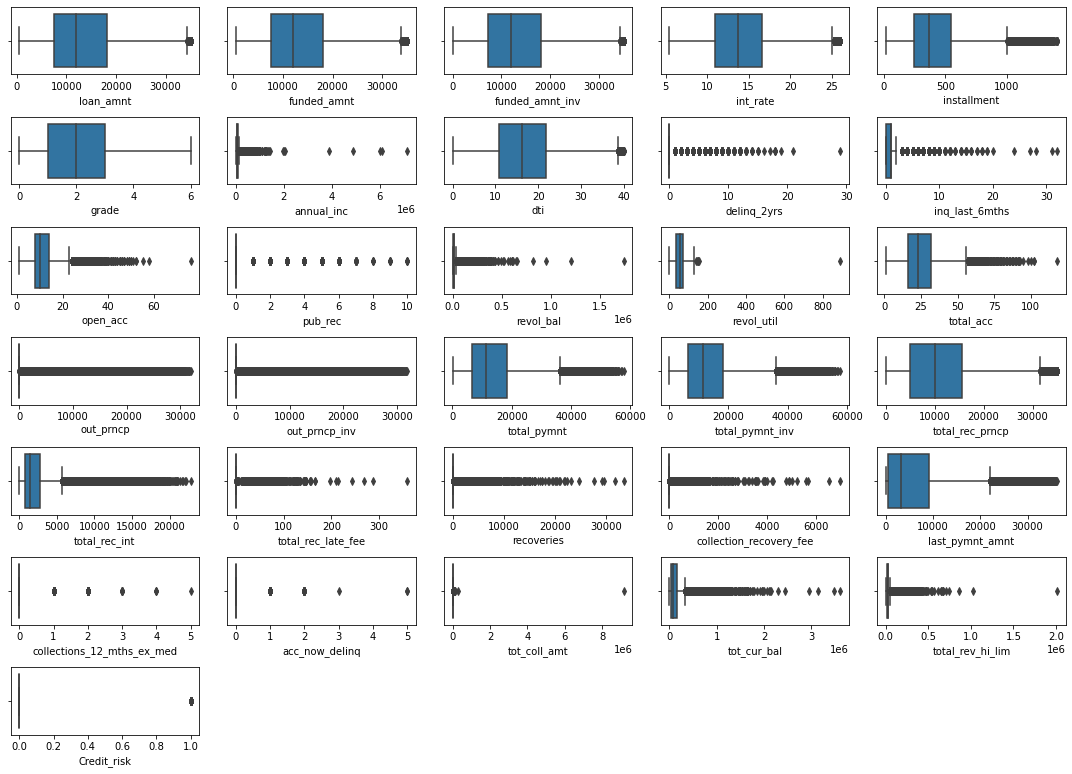

In [28]:
num = X_train.select_dtypes('number').columns

plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(int(len(num)/3), 5, i+1)
    sns.boxplot(data=X_train,x=X_train[num[i]])
    plt.tight_layout();

Conclusion : 

- Terdapat beberapa outlier extreme pada data, maka dapat menggunakan zscore untuk menghilangkan outliers tersebut

In [29]:
outliers = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

In [30]:
# z-score
z = np.abs(stats.zscore(X_train[outliers]))

print("Data shape sebelum di hilangkan outliers {}".format(X_train.shape))

#handling outliers menggunakan z_score dengan treshold = 3
X_train= X_train[(z < 3).all(axis=1)]

print("Data shape setelah handling outliers {}".format(X_train.shape))

Data shape sebelum di hilangkan outliers (179090, 46)
Data shape setelah handling outliers (153701, 46)


In [31]:
y_train = y_train[y_train.index.isin(X_train.index)]

Conclusion : 

- Setelah dilakukan handling outliers menggunakan z-score, dimensi data menjadi 153084 baris
- Data yang dibuang berjumlah 26006 baris (14.5%), sehingga dataset yang digunakan masih menganggung informasi sebesar 85.5%

### 7.2 Check Distribution

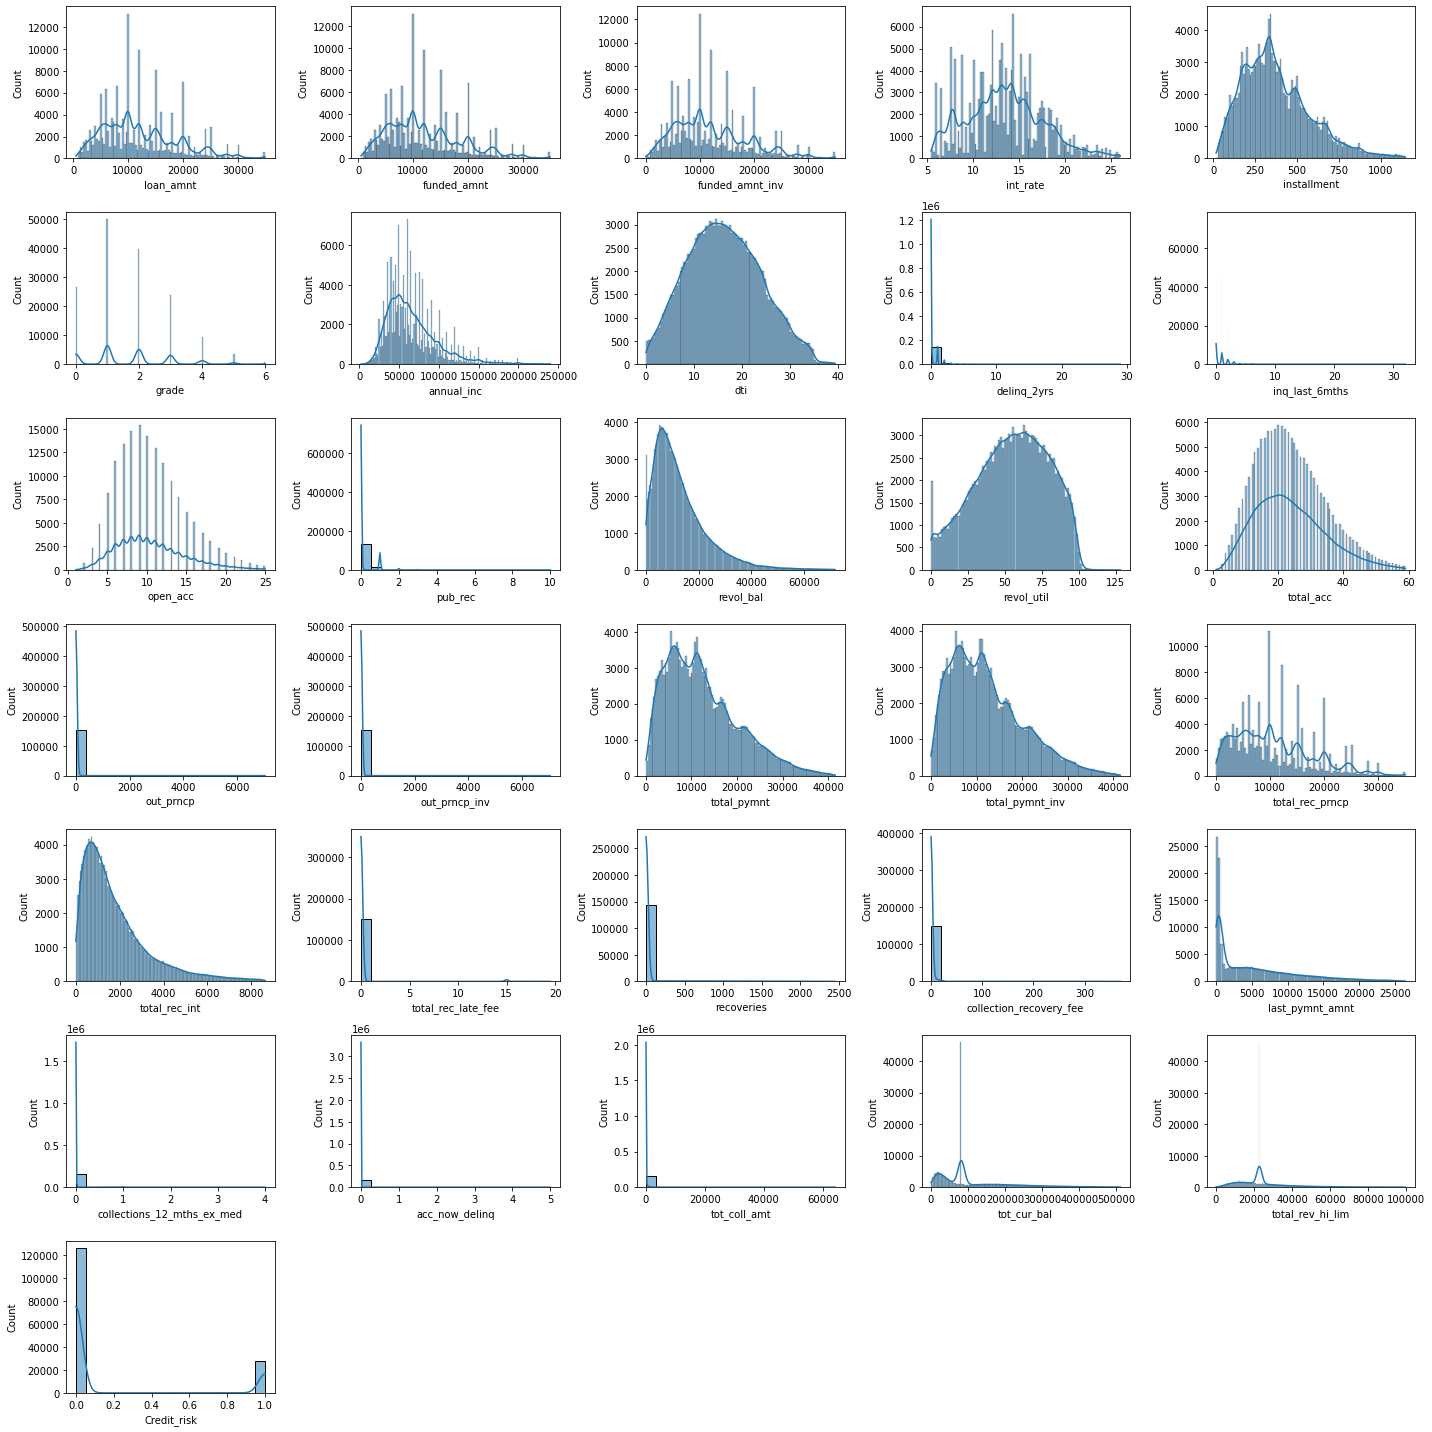

In [32]:
# histogram check

num = X_train.select_dtypes('number').columns
plt.figure(figsize=(20,20))
for i in range(0,len(num)):
    plt.subplot(int(len(num)/4),5,i+1)
    sns.histplot(data=X_train,x=X_train[num[i]],kde=True)
    plt.tight_layout();

Conclusion :
    
- Banyak kolom yang memiliki skew

## 8. Multivariate Analysis

### 8.1 Corellation Numeric with Target

Text(0.5, 1.0, 'Correlation Matrix')

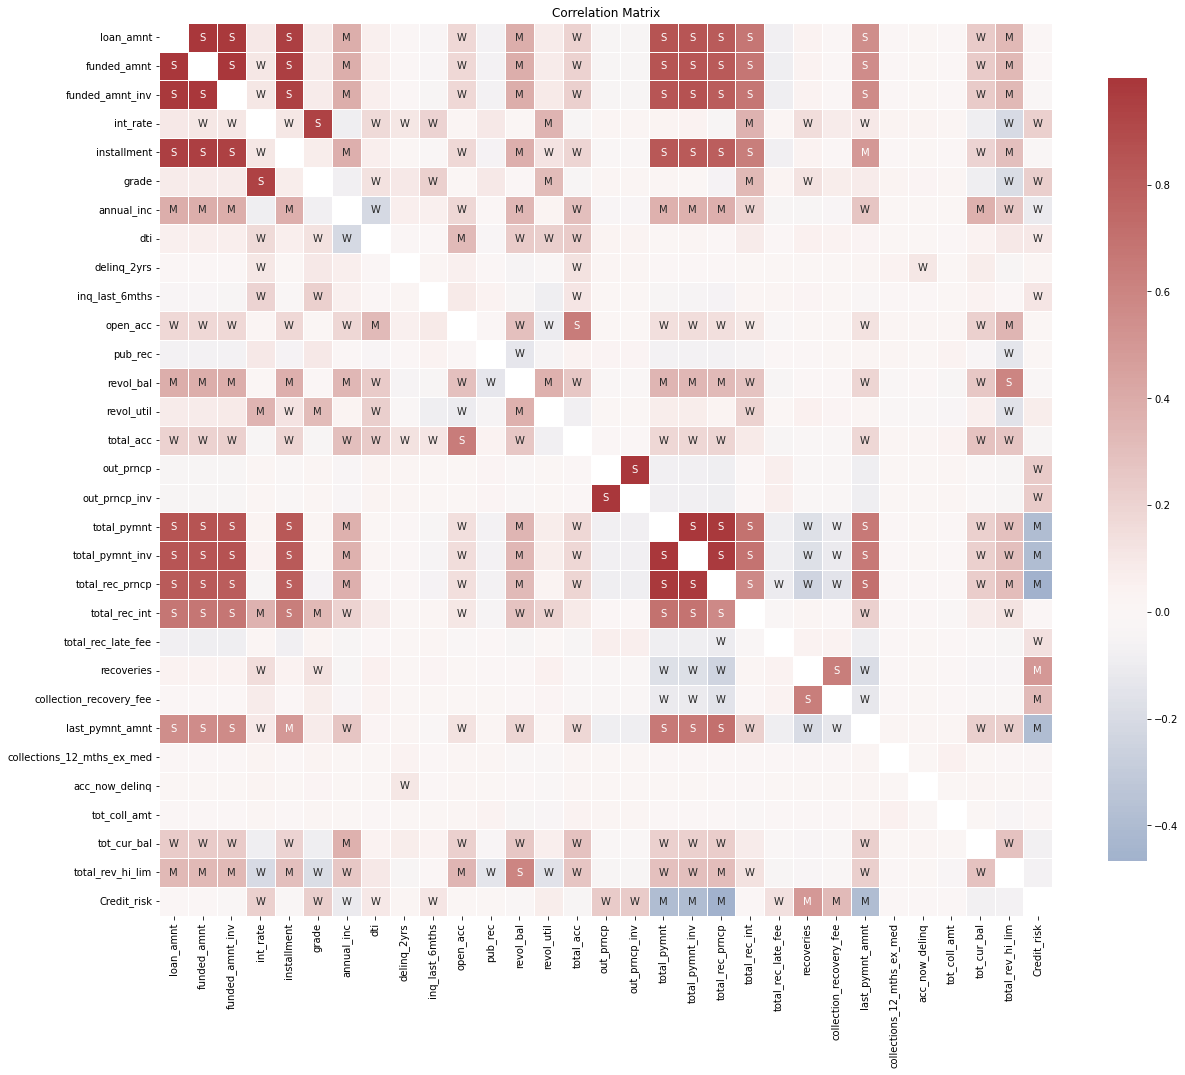

In [33]:
# Let's run a correlation matrix using the Pearson method
X_train_corr = X_train.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(X_train_corr)>0.5,'S',
                  np.where(np.abs(X_train_corr)>0.3,'M',
                           np.where(np.abs(X_train_corr)>0.1,'W','')))

# Plot correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(X_train_corr, mask=np.eye(len(X_train_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});
plt.title('Correlation Matrix')

Conclusion :

- Ada 8 Kolom yang memiliki korelasi yang cukup rendah dengan target variabel (`Credit_risk`)
- Ada 6 Kolom yang memiliki korelasi yang cukup tinggi dengan target variabel (`Credit_risk`)

In [34]:
feature_num = ['int_rate','grade','annual_inc','dti','inq_last_6mths','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

### 8.2 Corellation Categorical with Target

In [35]:
feature_cat = X_train[['term','emp_length','home_ownership','verification_status','pymnt_plan','initial_list_status','Credit_risk']]

In [36]:
feature_cat = pd.get_dummies(feature_cat)

In [37]:
Credit_risk_cat = pd.DataFrame(feature_cat.corr()["Credit_risk"]).reset_index().rename(columns=({
    "index":"categorical",
    "Credit_risk":"correlation"})).sort_values("correlation",ascending=False)

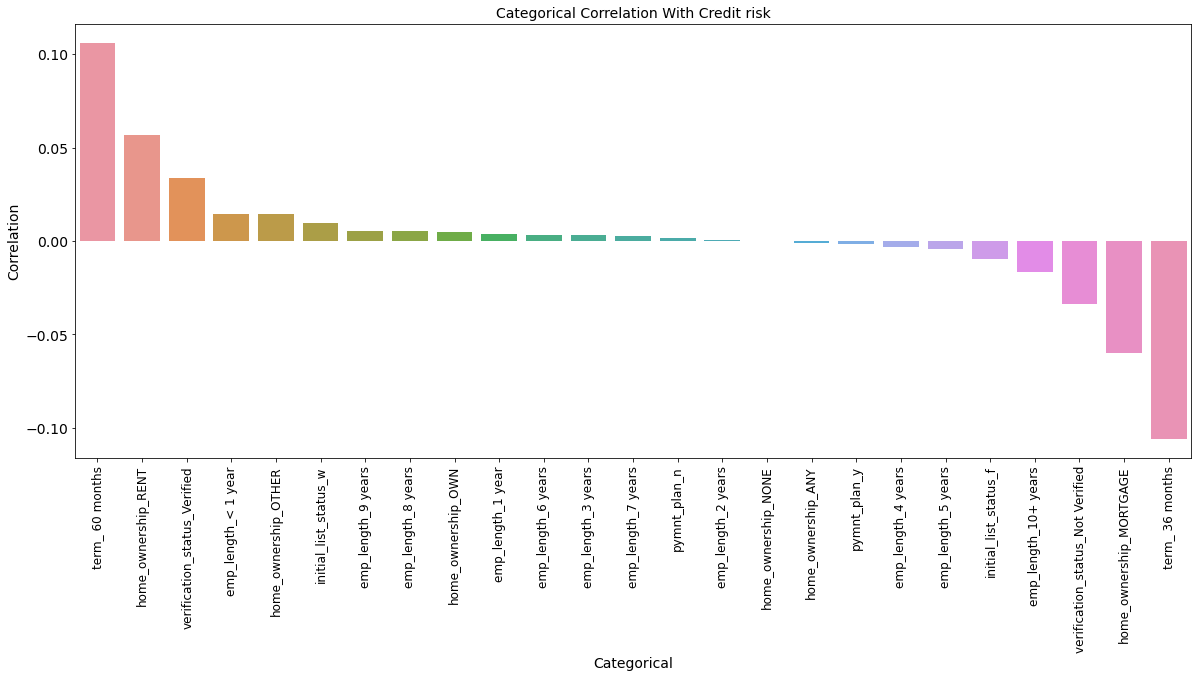

In [38]:
Credit_risk_cat = Credit_risk_cat[1:]
plt.figure(figsize=(20,8))
sns.barplot(data=Credit_risk_cat,y="correlation",x="categorical")
plt.title("Categorical Correlation With Credit risk",fontsize=14)
plt.xlabel("Categorical",fontsize=14)
plt.xticks(fontsize=12,rotation=90)
plt.ylabel("Correlation",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Conclusion :

- Ambil feature dengan korelasi data lebih dari 0,05 atau kurang dari -0,05

In [39]:
feature_cat = Credit_risk_cat.copy() 

In [40]:
feature_cat = Credit_risk_cat[(Credit_risk_cat.correlation > 0.02) | (Credit_risk_cat.correlation < -0.02)]

In [41]:
feature_cat = list(feature_cat['categorical'])

## 9. Feature Analysis

In [42]:
#numerical vs categoric
#num,cat
def num_category (n,c) :
    ax = (loan_bi.groupby([c])[n].median()).plot(kind='bar',figsize=(8,6))
    abs_values = round((loan_bi.groupby([c])[n].median()),1)
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    
    plt.title(f'{n} vs {c}',fontsize=12)
    plt.ylabel(c,fontsize=12)
    plt.xlabel(n,fontsize=12)
    plt.xticks(rotation=0);
    plt.ylim(0,max(abs_values)+100)
    plt.show()

### 9.1 Profil Credit Analysis

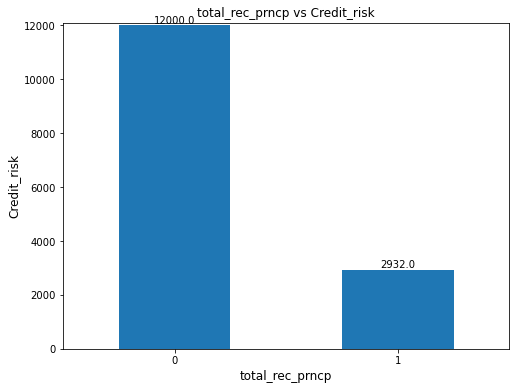

In [43]:
num_category('total_rec_prncp','Credit_risk')

#### Conclusion :

Secara median, perbedaan modal yang sudah diterima antara good cust dan bad cust adalah 60%. Nasabah yang dengan credit risk cenderung lebih sedikit menerima modal daripada cust tanpa credit risk 

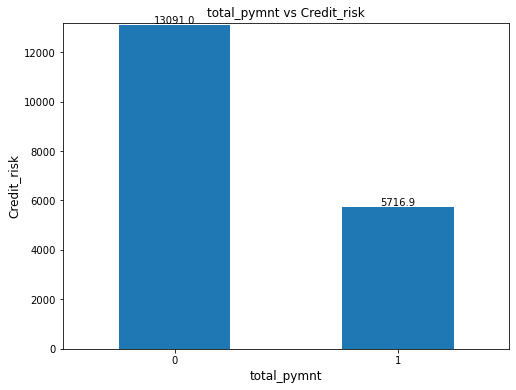

In [44]:
num_category('total_pymnt','Credit_risk')

#### Conclusion :

Secara median, perbedaan pembayaran total angsuran antara good cust dan bad cust adalah 39%. Nasabah yang dengan credit risk cenderung lebih sedikit membayarkan angsuran daripada cust tanpa credit risk

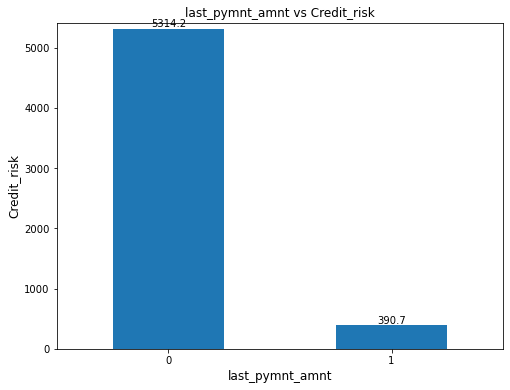

In [45]:
num_category('last_pymnt_amnt','Credit_risk')

#### Conclusion :

Secara median, perbedaan jumlah pembayaran angsuran terakhir antara good cust dan bad cust adalah 86%. Nasabah yang dengan credit risk cenderung lebih sedikit membayarkan angsuran bulanan daripada cust tanpa credit risk

<AxesSubplot:xlabel='term', ylabel='Credit_risk'>

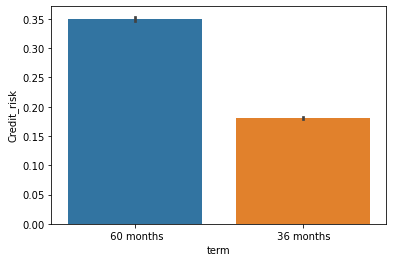

In [46]:
sns.barplot(x=loan_bi['term'],y=loan_bi['Credit_risk'])

#### Conclusion :

Nasabah dengan tenure 3 tahun lebih banyak yang merupakan good customer

### 9.2 Profil Customer Analysis

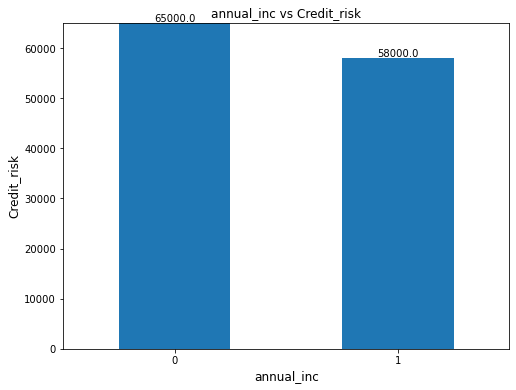

In [47]:
num_category('annual_inc','Credit_risk')

#### Conclusion :

Secara median, Pengahasilan tahunan nasabah tanpa credit risk lebih besar (5,6%) daripada nasabah dengan credit risk

<AxesSubplot:xlabel='home_ownership', ylabel='Credit_risk'>

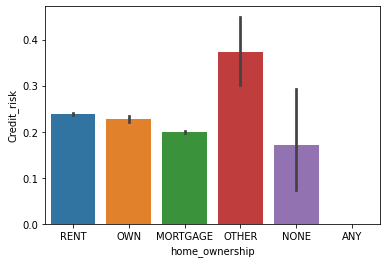

In [48]:
sns.barplot(x=loan_bi['home_ownership'],y=loan_bi['Credit_risk'])

#### Conclusion :

Nasabah dengan status kepemilikan rumah Mortage cenderung memiliki peluang mengembalikan lebih tinggi, namun tidak berbeda signifikan dengan status Own, dan Rent

# Data Preprocesing

## 9. Feature Selection

### 9.1 Train Data

In [49]:
## Drop column not use for modeling
X_train.drop(['sub_grade','emp_title', 'issue_d','purpose','title','addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d','Credit_risk'], axis = 'columns', inplace = True)

In [50]:
# Get one hot encoding of columns B
X_train = pd.get_dummies(X_train)

In [51]:
modeling_feature = feature_num + feature_cat 

In [52]:
X_train = X_train[modeling_feature]

### 9.2 Test Data

In [53]:
X_test.drop(['sub_grade','emp_title', 'issue_d','purpose','title','addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d','Credit_risk'], axis = 'columns', inplace = True)

In [54]:
X_test = pd.get_dummies(X_test)

In [55]:
X_test = X_test[modeling_feature]

## 10. Multicollinearity Check

In [56]:
# calculate VIF scores for each feature
X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

feature  vif_score
1                           int_rate   9.827637
2                              grade   9.509436
3                         annual_inc   1.310436
4                                dti   1.106903
5                     inq_last_6mths   1.081735
..                               ...        ...
16               home_ownership_RENT   3.608860
17      verification_status_Verified        inf
18  verification_status_Not Verified        inf
19           home_ownership_MORTGAGE   3.672651
20                   term_ 36 months        inf

[20 rows x 2 columns]

Konklusi :

Terdapat beberapa features yang memiliki VIF score tinggi (>4), maka ada beberapa feature yang saling berkorelasi. Untuk mengetahui feautre apa saja yang saling berkorelasi dapat menggunakan heatmap.

In [57]:
vif_chcek = X_train.copy()
vif_chcek['Credit_risk'] = loan['Credit_risk']

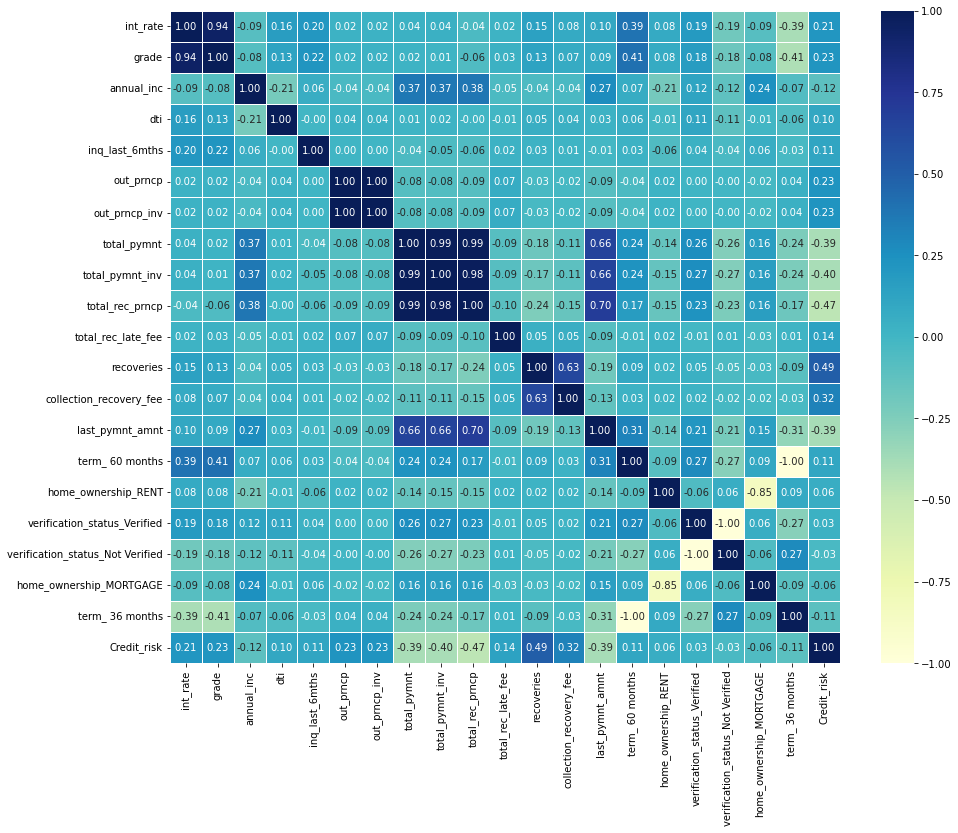

In [58]:
fig, ax = plt.subplots(figsize = (15, 12))
sns.heatmap(vif_chcek.corr(),cbar=True,annot=True,linewidths=0.5,ax=ax,fmt='.2f',cmap="YlGnBu")
plt.show()

Konklusi :

Feature yang saling berkorelasi tinggi (>8)
1. `grade` dan `int_rate`
2. `total_rec_prncp` dan `total_pymnt_inv` dan `total_pymnt`
3. `out_prncp` dan `out_prncp_inv`

Maka, akan dihapus feature yang saling berkorelasi tinggi. Hapus beberapa feature saja, dengan ketentuan feature yang memiliki nilai korelasi dengan target variabel yang paling rendah. Maka hapus feature `int_rate`, `total_pymnt_inv`, `total_pymnt`, dan `out_prncp_inv`

In [59]:
## Drop selected feature 
X_train.drop(['int_rate','total_pymnt_inv','out_prncp_inv','total_pymnt'], axis = 'columns', inplace = True)
X_test.drop(['int_rate','total_pymnt_inv','out_prncp_inv','total_pymnt'], axis = 'columns', inplace = True)

## 11. Feature Transformation

In [60]:
abc = X_train.copy()

In [61]:
abc.head()

grade  annual_inc    dti  inq_last_6mths  out_prncp  total_rec_prncp  \
380918      3     55000.0  30.05             2.0        0.0          12575.0   
94          1     39120.0  21.01             0.0        0.0           7000.0   
223586      1     45200.0  21.72             0.0        0.0          22025.0   
97503       2     50000.0  26.38             1.0        0.0           6000.0   
213409      1     70000.0  11.90             2.0        0.0           5000.0   

        total_rec_late_fee  recoveries  collection_recovery_fee  \
380918                 0.0         0.0                      0.0   
94                     0.0         0.0                      0.0   
223586                 0.0         0.0                      0.0   
97503                  0.0         0.0                      0.0   
213409                 0.0         0.0                      0.0   

        last_pymnt_amnt  term_ 60 months  home_ownership_RENT  \
380918          8686.60                0                    0   
94              4235.03                0                    0   
223586         15072.24                1                    1   
97503           4965.60                0                    1   
213409           801.96                0                    0   

        verification_status_Verified  verification_status_Not Verified  \
380918                             0                                 1   
94                                 0                                 1   
223586                             1                                 0   
97503                              0                                 1   
213409                             0                                 1   

        home_ownership_MORTGAGE  term_ 36 months  
380918                        1                1  
94                            0                1  
223586                        0                0  
97503                         0                1  
213409                        1                1

In [62]:
# Pilih feature yang akan di log transform
feature_t = ['annual_inc','inq_last_6mths','out_prncp','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

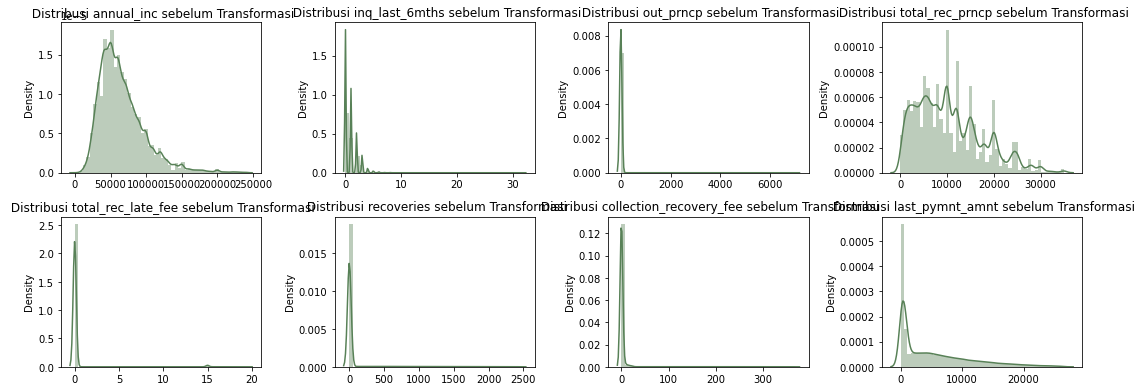

In [63]:
plt.figure(figsize=(15,8))

for x in range(0, len(feature_t)):
    plt.subplot(3, 4, x+1)
    sns.distplot(x=X_train[feature_t[x]], color='#588157')
    plt.title(f' Distribusi {feature_t[x]} sebelum Transformasi')
    plt.tight_layout()

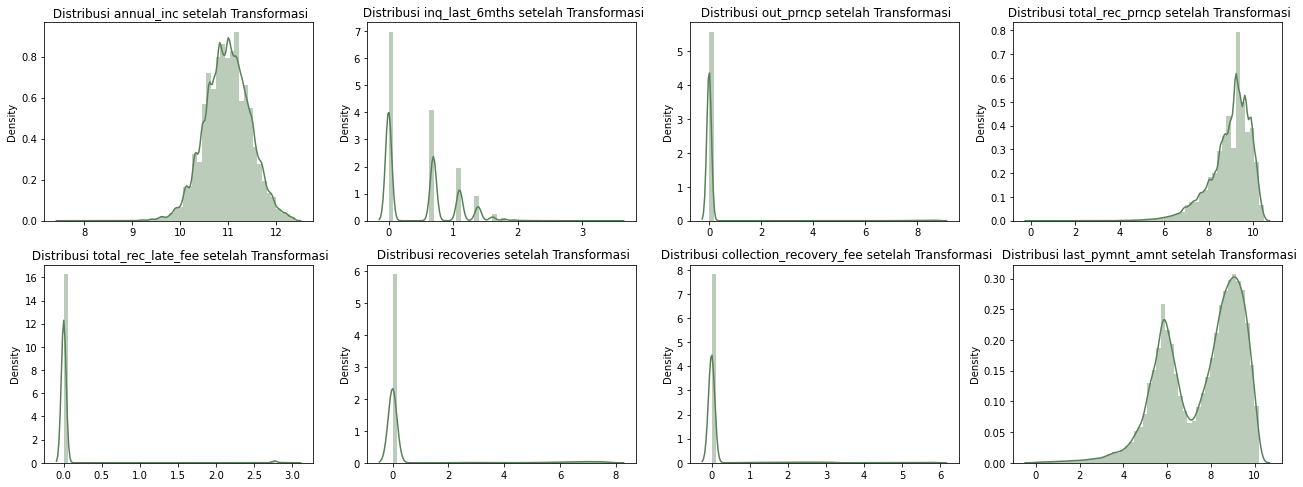

In [64]:
plt.figure(figsize=(18,10))

for x in range(0, len(feature_t)):
    plt.subplot(3, 4, x+1)
    sns.distplot(x=np.log1p(X_train[feature_t[x]]), color='#588157')
    plt.title(f' Distribusi {feature_t[x]} setelah Transformasi')
    plt.tight_layout()

Conclusion :

- Tidak ada feature yang `inq_last_6mths`, 

In [65]:
X_train[feature_t] = np.log1p(X_train[feature_t])

## 12. Feature Scaling

In [66]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

In [67]:
scaler = StandardScaler()

In [68]:
feature_s = ['grade','annual_inc','dti','inq_last_6mths','out_prncp','total_rec_prncp','total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_amnt']

In [69]:
X_train_scale[feature_s] = scaler.fit_transform(X_train_scale[feature_s])
X_test_scale[feature_s] = scaler.fit_transform(X_test_scale[feature_s])

## 13. Handling Imbalance Data

In [70]:
# Handling Imbalance Data

print("Sebelum di undersampling:", Counter(y_train))

undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 1)
x_train_under, y_train_under = undersample.fit_resample(X_train, 
                                                        y_train)

print("Sesudah di undersampling:", Counter(y_train_under))

Sebelum di undersampling: Counter({0: 125965, 1: 27736})
Sesudah di undersampling: Counter({0: 27736, 1: 27736})


In [71]:
# Handling Imbalance Data - SCale

print("Sebelum di undersampling:", Counter(y_train))

undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 1)
x_train_under_scale, y_train_under_scale = undersample.fit_resample(X_train_scale, 
                                                        y_train)

print("Sesudah di undersampling:", Counter(y_train_under_scale))

Sebelum di undersampling: Counter({0: 125965, 1: 27736})
Sesudah di undersampling: Counter({0: 27736, 1: 27736})


# Modeling

## 14. Modeling Data

In [72]:
def eval_train (X,y,model) :
    model.fit(X,y)
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,model.predict_proba(X)[:,1])}')
    
    disp.plot()

In [73]:
def eval_test (X,y,model) :
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,model.predict_proba(X)[:,1])}')
    
    disp.plot()

### 14.1 Logistic Regression

In [74]:
logreg_model = LogisticRegression(random_state=42,class_weight='balance')

 Recall Score : 0.7690005768676089
 Precision Score : 0.9033883947479882
 F1 Score : 0.8307949986367
 ROC-AUC Score : 0.9695721561990239


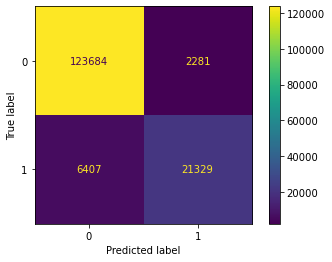

In [75]:
eval_train(X_train,y_train,logreg_model)

 Recall Score : 0.9989768774299161
 Precision Score : 0.23347680535628887
 F1 Score : 0.37849362328952985
 ROC-AUC Score : 0.541718263481269


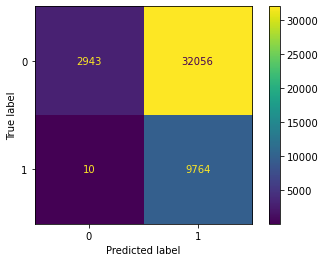

In [76]:
eval_test(X_test,y_test,logreg_model)

#### Undersampling

 Recall Score : 0.8885563888087684
 Precision Score : 0.9220322496165214
 F1 Score : 0.90498485265767
 ROC-AUC Score : 0.9711064054413407


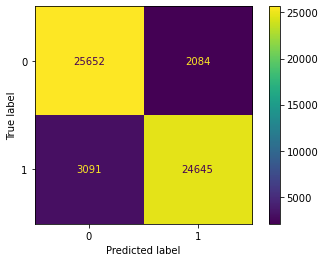

In [77]:
eval_train(x_train_under_scale, y_train_under_scale,logreg_model)

 Recall Score : 0.9744219357479026
 Precision Score : 0.369304742332002
 F1 Score : 0.5356128560582628
 ROC-AUC Score : 0.7560651021085328


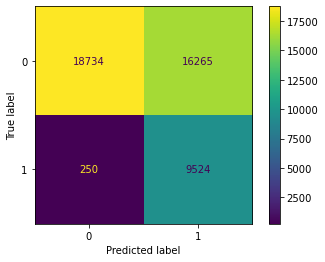

In [78]:
eval_test(X_test,y_test,logreg_model)

### 14.2 Naive Bayes

In [79]:
naive = GaussianNB()

 Recall Score : 0.5340712431496971
 Precision Score : 0.9384225530566994
 F1 Score : 0.6807288435467936
 ROC-AUC Score : 0.9713721575064959


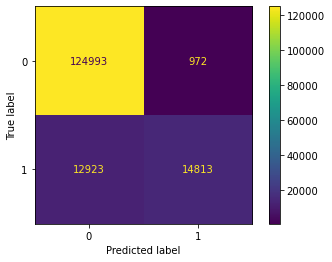

In [80]:
eval_train(X_train,y_train,naive)

 Recall Score : 0.6282995702885206
 Precision Score : 0.3916454081632653
 F1 Score : 0.48251748251748244
 ROC-AUC Score : 0.6778691528343412


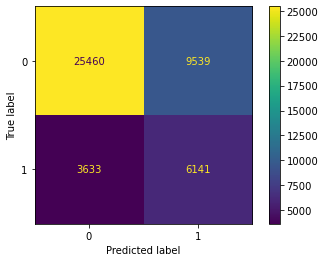

In [81]:
eval_test(X_test,y_test,naive)

#### Undersampling

 Recall Score : 0.5342515142774733
 Precision Score : 0.9854359247190264
 F1 Score : 0.6928669955345661
 ROC-AUC Score : 0.9713034642203981


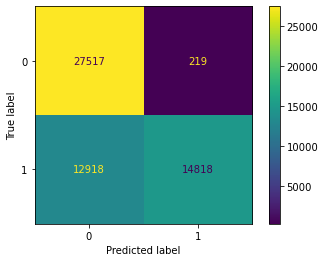

In [82]:
eval_train(x_train_under, y_train_under,naive)

 Recall Score : 0.6464088397790055
 Precision Score : 0.27855914642211543
 F1 Score : 0.3893390848867663
 ROC-AUC Score : 0.5894405980660221


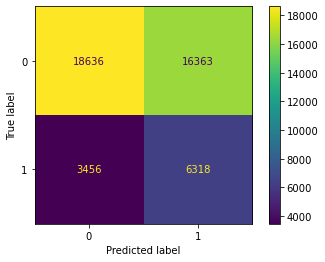

In [83]:
eval_test(X_test,y_test,naive)

### 14.3 Decision Tree

In [84]:
dt = DecisionTreeClassifier(random_state=42)

 Recall Score : 1.0
 Precision Score : 1.0
 F1 Score : 1.0
 ROC-AUC Score : 1.0


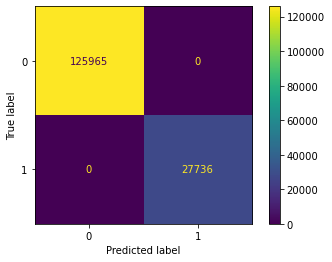

In [85]:
eval_train(X_train,y_train,dt)

 Recall Score : 0.6856967464702272
 Precision Score : 0.7615909090909091
 F1 Score : 0.7216539248411759
 ROC-AUC Score : 0.8128760883126871


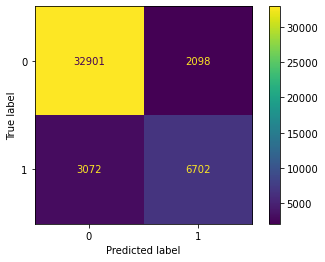

In [86]:
eval_test(X_test,y_test,dt)

### 14.4 Random Forest

In [87]:
rf = RandomForestClassifier(random_state=42)

 Recall Score : 1.0
 Precision Score : 1.0
 F1 Score : 1.0
 ROC-AUC Score : 1.0


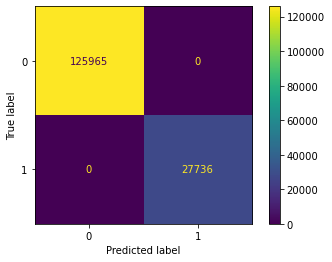

In [88]:
eval_train(X_train,y_train,rf)

 Recall Score : 0.6422140372416616
 Precision Score : 0.8982541499713795
 F1 Score : 0.7489559718410691
 ROC-AUC Score : 0.8510458567108173


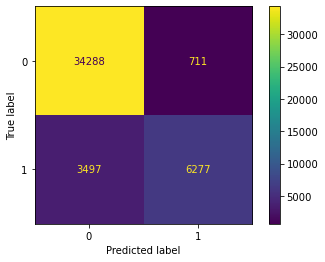

In [89]:
eval_test(X_test,y_test,rf)

Konklusi :

Dari beberapa model yang diuji, model yang dipilih adalah Random Forest Clasifier, karna memiliki recall yang paling tinggi dibandingkan yang lain yaitu 98%. Selain itu, model juga memiliki ROC-AUC Score tertinggi yaitu 84%, maka model memiliki kemampuan untuk membedakan antara 0 dan 1 dengan baik.

## 15. Evaluation

### 15.1 ROC Curve

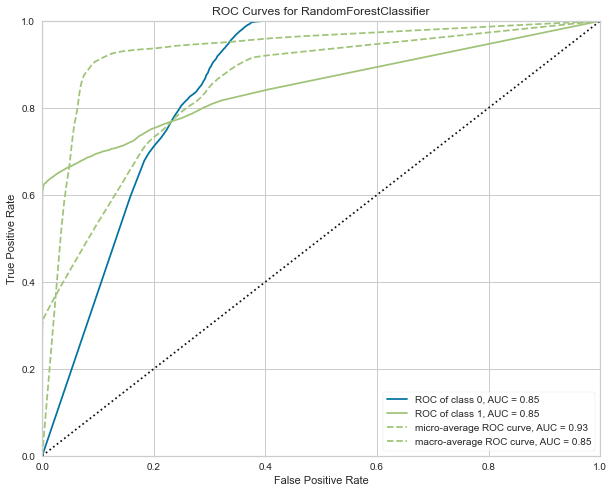

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [90]:
#grafik ROC
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(10,8))
oz = ROCAUC(rf)
oz.fit(x_train_under, y_train_under)
oz.score(X_test, y_test)
oz.show()

## 16. Feature Importance

In [91]:
import dalex as dx

rf_explainer = dx.Explainer(rf, x_train_under, y_train_under, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 55472 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 55472 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x0000029D31A6C550> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.484, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.41, mean = 0.016, max = 0.49
  -> model_info        : package sklearn

A new explainer has been created!


In [92]:
rf_explainer.model_profile().plot()

Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 16/16 [00:06<00:00,  2.56it/s]


In [93]:
# visualize permutation feature importance
rf_explainer.model_parts().plot()

## 17. Recommendation